In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
file_list = ["index_message_2016-6-2_1535.log.csv",
            "index_message_2016-6-2_1736.log.csv",
             "index_message_2016-6-2_2340.log.csv",
            "index_message_2016-6-3_0700.log.csv",
             "index_message_2016-6-3_0740.log.csv",
             "index_message_2016-6-3_0800.log.csv",
            ]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

index_message_2016-6-2_1535.log.csv
index_message_2016-6-2_1736.log.csv
index_message_2016-6-2_2340.log.csv
index_message_2016-6-3_0700.log.csv
index_message_2016-6-3_0740.log.csv
index_message_2016-6-3_0800.log.csv


In [5]:
ts_name = ["2", "2","2","1","1","1"]

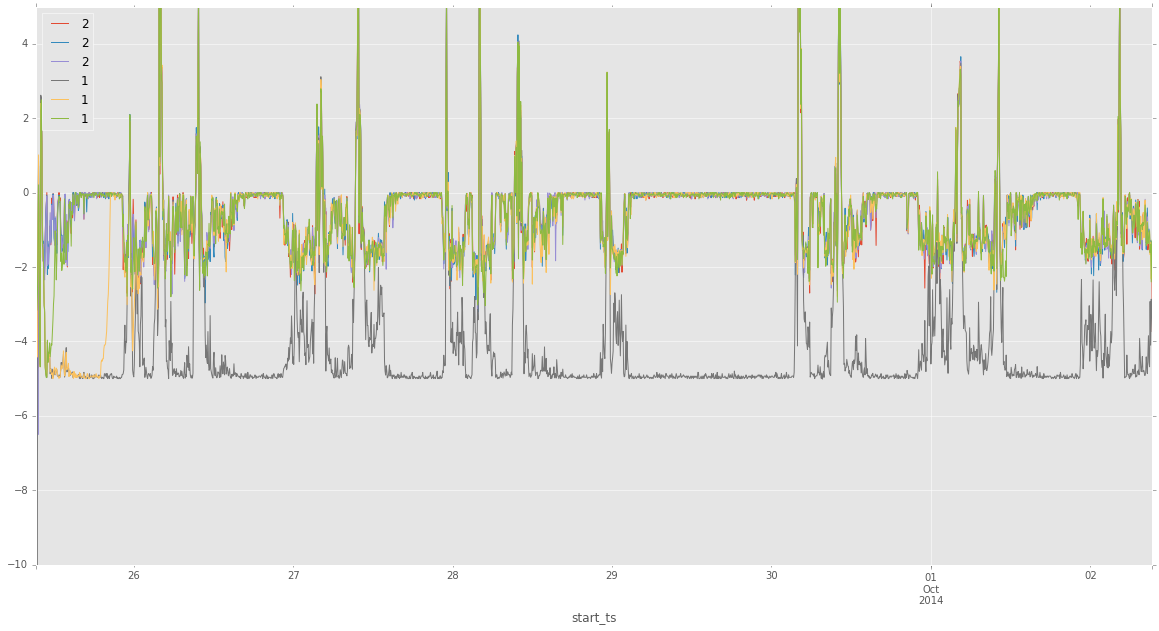

In [6]:
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df['total_reward'].resample('5Min')
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, ylim=(-10, 5))

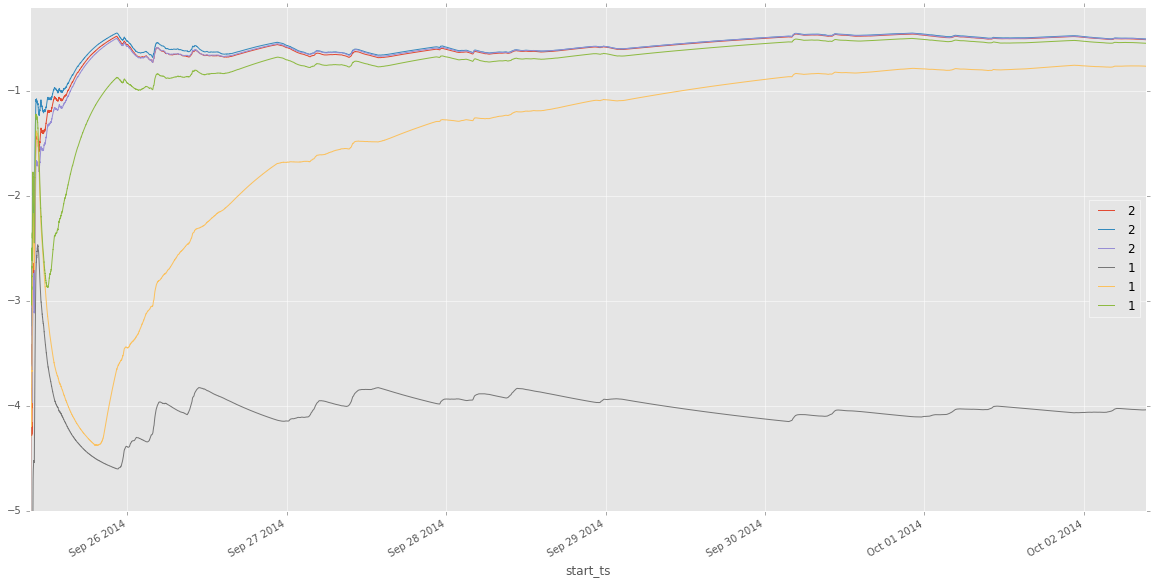

In [8]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, ylim=(-5, -0.2))